**Problem Statement**- Given Dataset contains information of the number of requisitions raised on daily basis.<br>Analyze the data and build a model
that can pedict the SLA for processing these requisitions.<br><br>
**Data Dictionary-** <br>
1. ID represents the Identification number
2. PR number represents unique requisition number.
3. Assignees represents the person approving the PR.
4. PR_total_amount_in_USD is the amount of the order
5. PR_Currency represents the Currency used.
6. Supplier_ID is the unique Supplier ID
8. Plant/location represents the unique location code.
9. PO_number represents the type of requisition, Y stands for Branch Location and N stands for Home location.
10. Line_number represents the number of line items in the order.
11. Commodity/Category represents purchase category.
12. Priority/rush suggets if the PR needs to be processed on priority.
13. Time Zone represents time zone.
14. Attachment represents the price supporting document against the Order.
15. SLA_in_Hours is the SLA processing time.

The target feature is 'SLA_in_Hours'.


In [1]:
#importing required libraries
import pandas as pd, numpy as np

In [2]:
#reading the dataset
data = pd.read_excel('Requisition_Data.xlsx')

In [3]:
# reading top 5 records.
data.head(5)

,ID,PR_Number,Assignees,PR_total_amount_in_USD,PR_Currency,Supplier_ID,Plant/location,PO_number,Line_number,Commodity/Category,Priority/rush,Time Zone,Attachment,SLA_in_Hours
0,607352786,AEPR4014146,Renee Pearson,120000.00,EURO,RG00001534,GER1765,Y,1,Direct Mailing / Lettersh,N,NaN,SOW/Work Order,2.533704
1,600856722,AEPR4016928,Renee Pearson,84.70,EURO,RG00000258,GER2233,N,1,Shipping And Special Char,N,NaN,Invoice,21.283520
2,600366025,AEPR4021512,Aeron Shilts,600.00,EURO,NaN,GER2233,N,1,Audio And Visual Equipmen,N,NaN,Invoice,5.109720
3,603463405,AEPR4023137,Sophie Mclare,563901.84,EURO,FR00000059,GER2233,N,1,IT Consulting,N,NaN,Change Order,2.986016
4,601092383,AEPR4023151,Renee Pearson,24355.87,EURO,RG00001905,GER2233,N,1,Direct Mailing / Lettersh,N,NaN,Invoice,2.506944


In [4]:
data.shape
#Dataset has 1200 records and 14 features.

(1200, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1200 non-null   int64  
 1   PR_Number               1200 non-null   object 
 2   Assignees               1190 non-null   object 
 3   PR_total_amount_in_USD  1200 non-null   float64
 4   PR_Currency             1200 non-null   object 
 5   Supplier_ID             1176 non-null   object 
 6   Plant/location          1200 non-null   object 
 7   PO_number               1144 non-null   object 
 8   Line_number             1200 non-null   int64  
 9   Commodity/Category      1200 non-null   object 
 10  Priority/rush           1200 non-null   object 
 11  Time Zone               0 non-null      float64
 12  Attachment              1191 non-null   object 
 13  SLA_in_Hours            1200 non-null   float64
dtypes: float64(3), int64(2), object(9)
memor

In [6]:
data.duplicated().any()
#checking for duplicate records

False

In [7]:
#Defining independent and target features
X = data.drop('SLA_in_Hours', axis = 1)

In [8]:
y = data[['SLA_in_Hours']]

In [9]:
#Segregating numerical and categorical features
#numerical features
data_num =  X.select_dtypes(['int64', 'float64'])

In [10]:
data_num.head(5)

,ID,PR_total_amount_in_USD,Line_number,Time Zone
0,607352786,120000.00,1,NaN
1,600856722,84.70,1,NaN
2,600366025,600.00,1,NaN
3,603463405,563901.84,1,NaN
4,601092383,24355.87,1,NaN


In [11]:
#Checking Missing values in the dataset.
#this function checks and prints the missing value percentage.
def missing_values(df) :
    col = df.columns
    r = df.shape[0]
    [print('Missing Values percentage for {} is {} %'.format(i, ((df[i].isnull().sum())/r) * 100)) for i in col]

In [12]:
missing_values(data_num)
# Calling the function to check missing values.

Missing Values percentage for ID is 0.0 %
Missing Values percentage for PR_total_amount_in_USD is 0.0 %
Missing Values percentage for Line_number is 0.0 %
Missing Values percentage for Time Zone is 100.0 %


In [13]:
#dropping the feature that has 100% records missing.
data_num.drop(['Time Zone', 'ID'], axis = 1, inplace = True)
#Also dropping ID as it is less relevant in prediction.

In [14]:
#checking quantiles
data_num.describe(percentiles=[0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.7,0.8,0.85 , 0.9,0,0.95,0.99]).T

,count,mean,std,min,0%,1%,5%,10%,25%,30%,40%,50%,60%,70%,80%,85%,90%,95%,99%,max
PR_total_amount_in_USD,1200.0,216154.734517,1.332063e+06,0.0,0.0,0.0,0.0,342.336,2394.57,3705.175,8121.782,16650.12,32496.104,53735.34,116759.352,175883.8,292575.57,724230.902,3340652.76,31999600.0
Line_number,1200.0,1.000833,2.886751e-02,1.0,1.0,1.0,1.0,1.000,1.00,1.000,1.000,1.00,1.000,1.00,1.000,1.0,1.00,1.000,1.00,2.0


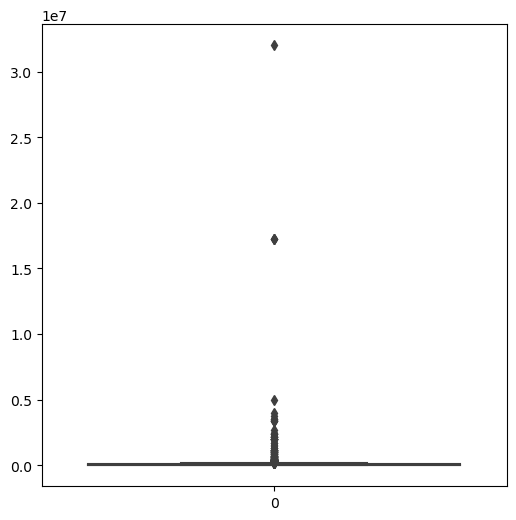

In [15]:
#Plotting Outliers
import matplotlib.pyplot as plt, seaborn as sns
plt.figure(figsize = (6,6))
sns.boxplot(data_num['PR_total_amount_in_USD'])
plt.show()

In [16]:
#This function uses IQR(Inter Quantile range) method to treat the outliers
def iqr_capping(df, col, factor):
    import numpy as np
        
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
        
    iqr = q3 - q1 #inter quantile range
    
        
    upper_whisker = q3 + (factor*iqr) #ceiling
    lower_whisker = q1 - (factor*iqr) #floor
        
    df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [17]:
#Calling the functionm to treat the outliers taking factor as 1.5
#A higher factor will result in a wider range, potentially identifying fewer outliers, 
#while a lower factor will result in a narrower range, potentially identifying more outliers. 
iqr_capping(data_num, ['PR_total_amount_in_USD'], 1.5)

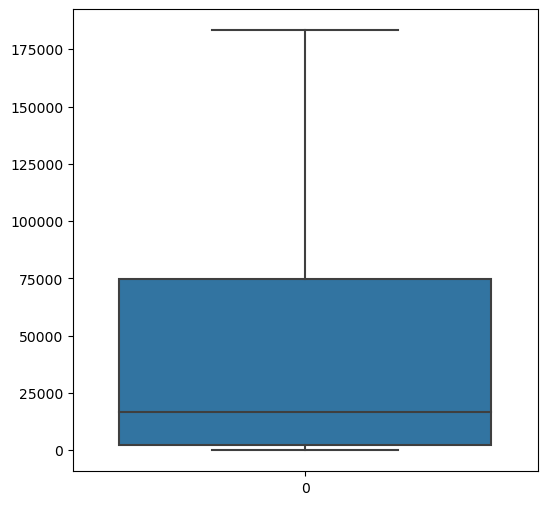

In [18]:
#Plotting Outliers again
import matplotlib.pyplot as plt, seaborn as sns
plt.figure(figsize = (6,6))
sns.boxplot(data_num['PR_total_amount_in_USD'])
plt.show()

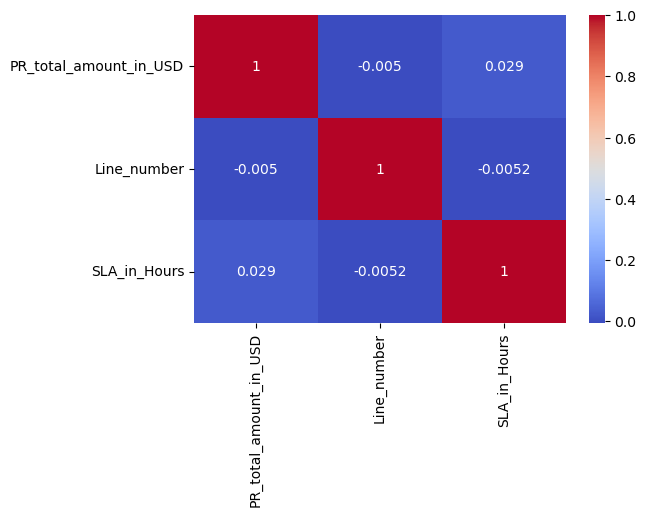

In [24]:
#Checking correlation between numerical features and the target feature
df1 = pd.concat([data_num, y], axis = 1, join = 'inner')
corr = df1.corr()
plt.figure(figsize = (6,4))
sns.heatmap(corr, cmap = 'coolwarm', annot = True)
plt.show()

#### Observations-
Although not much but significant relation-<br>
Positive relation between 'PR_total_amount_in_USD' and 'SLA_in_Hours'-A higher PR amount will lead to more SLA Hours<br>
Negative relation between 'Line_number' and 'SLA_in_Hours'- As number of line items increase, SLA Hours decrease.

In [25]:
#Categorical Features
data_cat = X.select_dtypes(include="object")

In [26]:
data_cat.head(5)

,PR_Number,Assignees,PR_Currency,Supplier_ID,Plant/location,PO_number,Commodity/Category,Priority/rush,Attachment
0,AEPR4014146,Renee Pearson,EURO,RG00001534,GER1765,Y,Direct Mailing / Lettersh,N,SOW/Work Order
1,AEPR4016928,Renee Pearson,EURO,RG00000258,GER2233,N,Shipping And Special Char,N,Invoice
2,AEPR4021512,Aeron Shilts,EURO,NaN,GER2233,N,Audio And Visual Equipmen,N,Invoice
3,AEPR4023137,Sophie Mclare,EURO,FR00000059,GER2233,N,IT Consulting,N,Change Order
4,AEPR4023151,Renee Pearson,EURO,RG00001905,GER2233,N,Direct Mailing / Lettersh,N,Invoice


In [27]:
#Dropping PR_Number as it is less relevant in prediction.
data_cat.drop('PR_Number', axis = 1, inplace = True)
#dropping PR_currency feature because of no Variation.
data_cat.drop('PR_Currency', axis = 1, inplace = True)

In [28]:
missing_values(data_cat)
# Calling the function to check missing values.

Missing Values percentage for Assignees is 0.8333333333333334 %
Missing Values percentage for Supplier_ID is 2.0 %
Missing Values percentage for Plant/location is 0.0 %
Missing Values percentage for PO_number is 4.666666666666667 %
Missing Values percentage for Commodity/Category is 0.0 %
Missing Values percentage for Priority/rush is 0.0 %
Missing Values percentage for Attachment is 0.75 %


In [29]:
#This function returns the columns having missing values
def NAN_values(df) :
    col = df.columns.tolist()
    missing_data = {}
    for i in col :
        a = (df[i].isnull().sum()/1200) * 100
        if a > 0 :
            missing_data[i] = a
    return missing_data

In [30]:
NAN_values(data_cat)
#calling the function

{'Assignees': 0.8333333333333334,
 'Supplier_ID': 2.0,
 'PO_number': 4.666666666666667,
 'Attachment': 0.75}

In [31]:
#treating the missing values

In [32]:
#This function returns the number of unique categories
def no_of_categories(df) :
    cols = df.columns
    [print('Number of unique categories in {} is {}'.format(i, df[i].nunique())) for i in cols]
    [print('Unique Categories of {} are {}'.format(i, df[i].unique())) if df[i].nunique() < 5 
     else print('{} has more than 5 categories to print'.format(i)) for i in cols]

In [33]:
no_of_categories(data_cat)

Number of unique categories in Assignees is 3
Number of unique categories in Supplier_ID is 360
Number of unique categories in Plant/location is 71
Number of unique categories in PO_number is 3
Number of unique categories in Commodity/Category is 99
Number of unique categories in Priority/rush is 2
Number of unique categories in Attachment is 22
Unique Categories of Assignees are ['Renee Pearson' 'Aeron Shilts' 'Sophie Mclare' nan]
Supplier_ID has more than 5 categories to print
Plant/location has more than 5 categories to print
Unique Categories of PO_number are ['Y' 'N' nan ' Y']
Commodity/Category has more than 5 categories to print
Unique Categories of Priority/rush are ['N' 'Y']
Attachment has more than 5 categories to print


In [34]:
#joining the categorical features with the target feature
data_cat_1 = pd.concat([data_cat,y], axis = 1, join = 'outer')
data_cat_1.groupby('Assignees')['SLA_in_Hours'].median()

Assignees
Aeron Shilts     2.782916
Renee Pearson    2.800648
Sophie Mclare    2.755740
Name: SLA_in_Hours, dtype: float64

In [35]:
#filling missing values for Assignees.
import numpy as np
#creating logical conditions-
conditions = [
    data_cat_1['SLA_in_Hours'] >= 2.8,
    (data_cat_1['SLA_in_Hours'] >= 2.78) & (data_cat_1['SLA_in_Hours'] < 2.8),
    (data_cat_1['SLA_in_Hours'] <= 2.75) & (data_cat_1['SLA_in_Hours'] < 2.78)
]
#creating options
options = ['Renee Pearson', 'Aeron Shilts', 'Sophie Mclare']

data_cat['Assignees'] = np.select(conditions, options, default=data_cat_1['Assignees'])


In [36]:
data_cat.Assignees.isnull().any()
#No missing Values

False

In [37]:
data_cat['Supplier_ID'] = data_cat['Supplier_ID'].fillna('Supplier_to_be_identified')
#Where we are unable to decide which supplier to go with

In [38]:
data_cat.PO_number.unique()

array(['Y', 'N', nan, ' Y'], dtype=object)

In [39]:
#Mispelled entries in PO_number, replacing it with correct spelling.
data_cat['PO_number'] = np.where(data_cat['PO_number'] == ' Y', 'Y', data_cat_1['PO_number'])

In [40]:
data_cat['PO_number'] = data_cat['PO_number'].fillna(data_cat.PO_number.mode()[0])
#filling the missing values of Po_number with mode.

In [41]:
#checking unique values of the feature
data_cat.Attachment.unique()

array(['SOW/Work Order', 'Invoice', 'Change Order', 'Agreement ',
       'Document Missing', 'No Document required', 'Order Form',
       'Proposal/Estimate', nan, 'CEL', 'Sales Order',
       'Goods and Service Short Order form', 'SALES ORDER',
       'change Order', 'Amendment', 'Change Order ', 'Price Schedule',
       'change Order ', 'Addendum', 'Renewal notification letter',
       'Sales Order ', 'Amendment ', 'Contract renewal'], dtype=object)

In [42]:
#observed some mistyped categories. Rectifying them.
data_cat['Attachment'] = data_cat['Attachment'].replace({'SALES ORDER': 'Sales Order', 'change Order': 'Change Order', 
                                                         'change Order' : 'Change Order', 'Sales Order ' :'Sales Order',
                                                         'Amendment ' :'Amendment'})
data_cat_1['Attachment'] = data_cat_1['Attachment'].replace({'SALES ORDER': 'Sales Order', 'change Order': 'Change Order', 
                                                         'change Order' : 'Change Order', 'Sales Order ' :'Sales Order',
                                                         'Amendment ' :'Amendment'})


In [43]:
#creating a dictonary for Commodity and respective statistic mode values of Attachments received.
commodity = dict (data_cat_1.groupby('Commodity/Category')['Attachment'].apply(lambda X : X.mode().iloc[0]))

In [44]:
data_cat.Attachment.isnull().sum()

9

In [45]:
#Missing values of Attachment feature
data_cat[data_cat.Attachment.isnull()]

,Assignees,Supplier_ID,Plant/location,PO_number,Commodity/Category,Priority/rush,Attachment
24,Sophie Mclare,RG00003342,GER1765,N,Management Consulting,N,NaN
212,Sophie Mclare,RG00001401,GER2233,N,Miscellaneous Professiona,N,NaN
270,Renee Pearson,RG00003229,GER2161,N,Network & Telecom - Voice,N,NaN
323,Renee Pearson,RG00001401,GER0493,N,Other Workstation Equipme,N,NaN
367,Renee Pearson,RG00003243,GERADBuyer61895974,N,Security Equipment (purch,N,NaN
621,Sophie Mclare,RG00030355,GER0493,N,Shipping And Special Char,N,NaN
653,Renee Pearson,FR00000011,GER2233,N,Management Consulting,N,NaN
865,Sophie Mclare,RG00000676,GER2233,N,Financial Market Data,N,NaN
894,Renee Pearson,RG00001961,GER2233,N,IT Consulting,N,NaN


In [46]:
#filling missing values by mapping key values from earlier created dictionary.
data_cat['Attachment'] = data_cat['Attachment'].fillna(data_cat['Commodity/Category'].map(commodity))

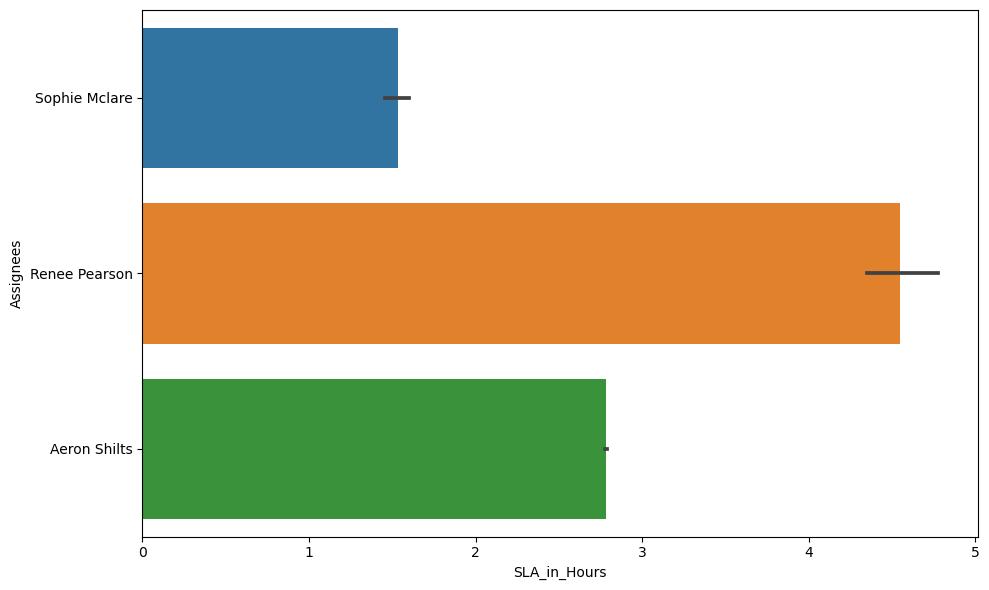

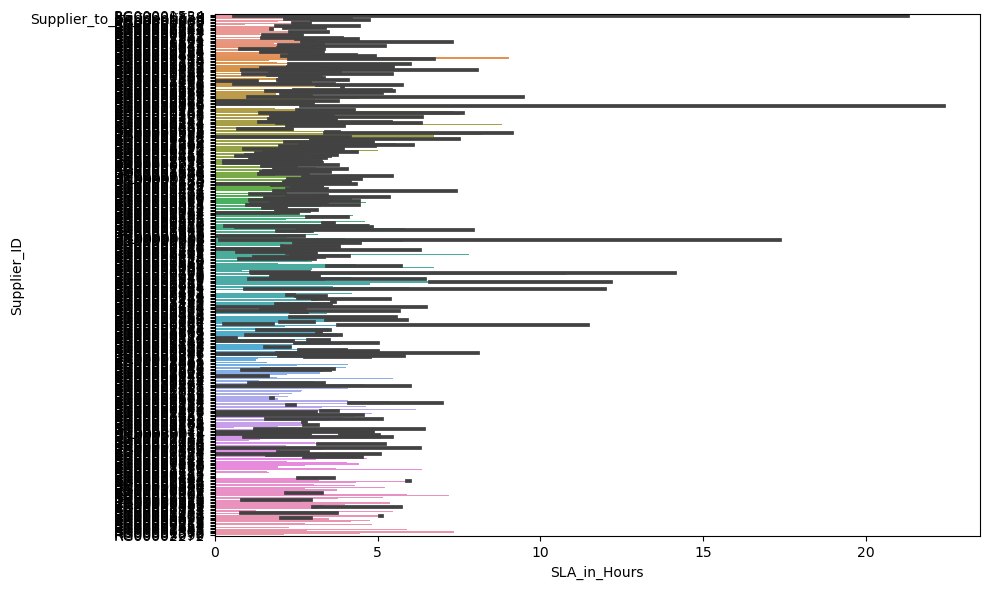

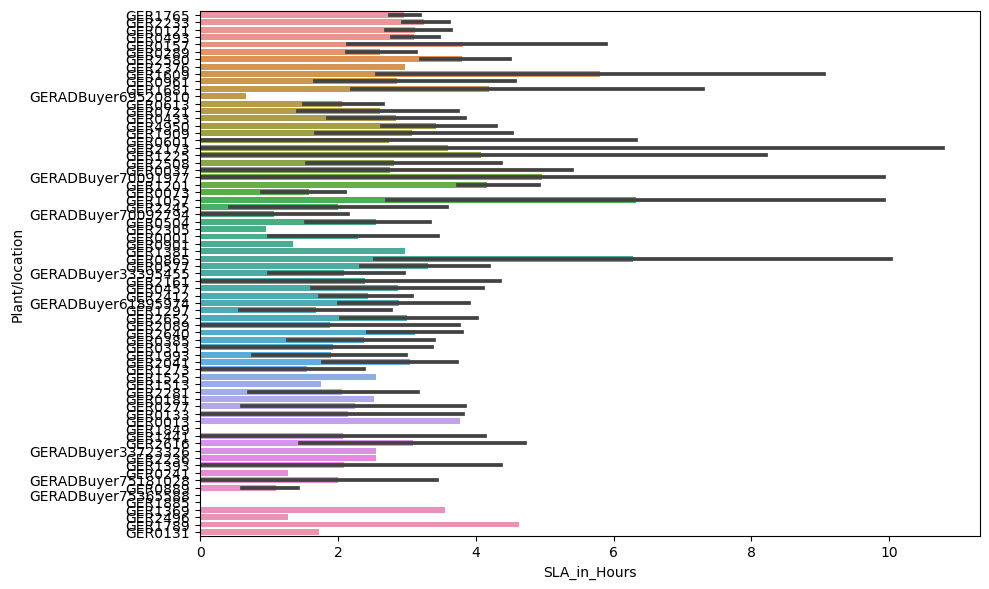

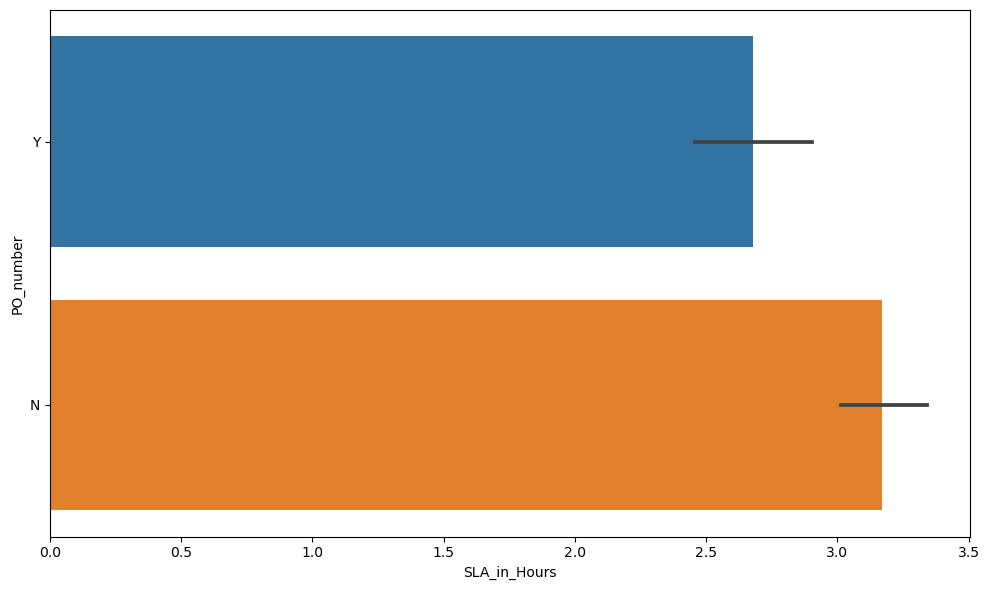

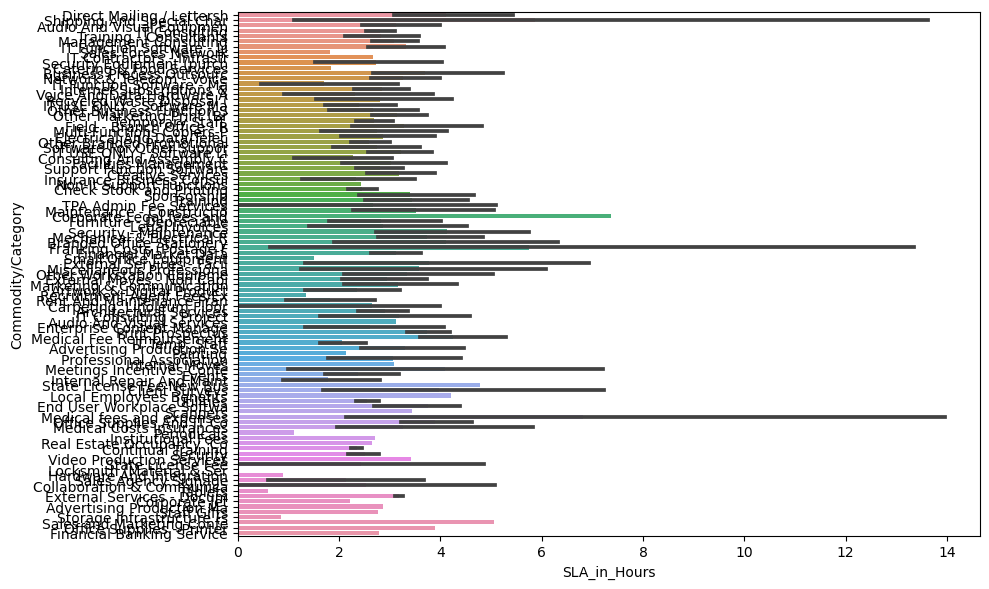

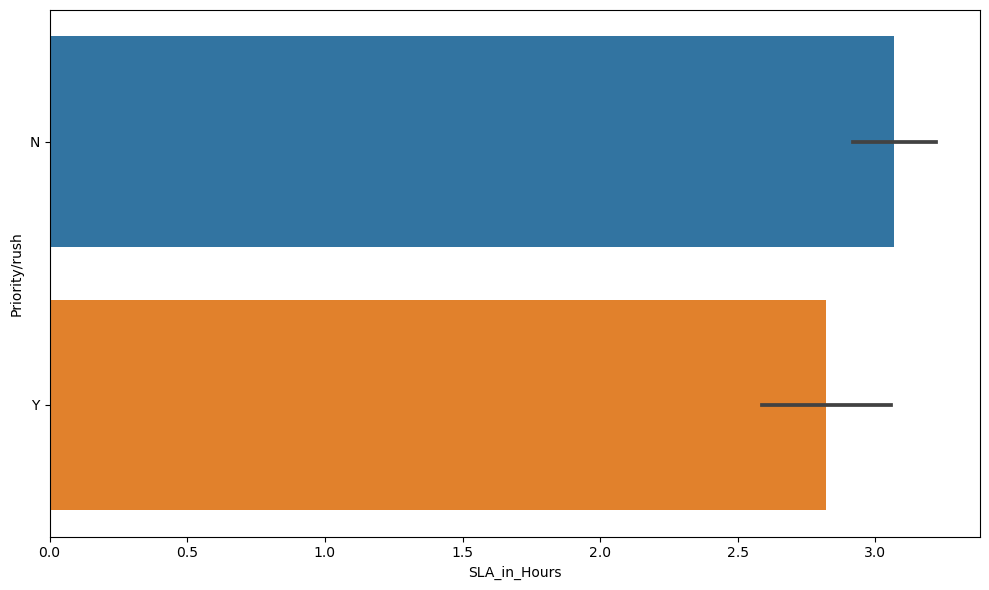

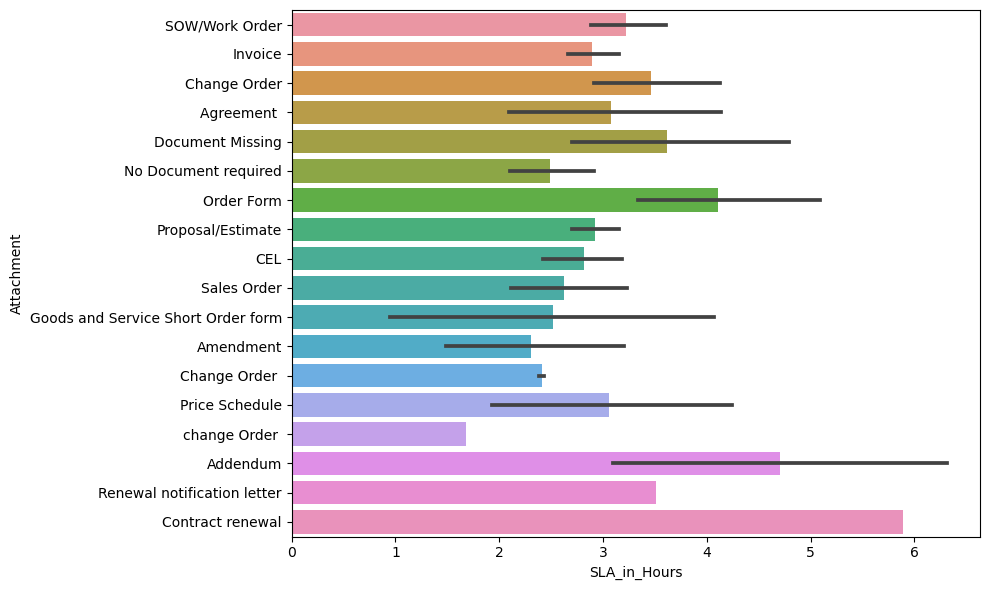

In [48]:
data_cat_merged=pd.concat([y,data_cat],axis=1,join='outer')
for col in (data_cat.columns):
    plt.figure(figsize=(10,6))
    sns.barplot(y=col, x="SLA_in_Hours",data=data_cat_merged, estimator = np.mean )
    plt.tight_layout()
plt.show()

In [49]:
#getting dummies for categorical features
data_dum = pd.get_dummies(data_cat, drop_first = True)

In [50]:
data_dum.shape
#We've got a huge number of columns now.

(1200, 549)

In [51]:
# Selecting K Best for Categorical Features.
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=20)
#reducing the dimensonality-Using f_regression test as score function to check independence of 
#Features w.r.t target and picking top 20.

#It measures the ratio of explained variance to unexplained variance in a regression model. 
#Higher F-statistic values suggest a more significant relationship between the independent and dependent variables.

In [52]:
selector.fit_transform(data_dum, y)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[False,  True, False, ..., False, False, False],
       [ True, False,  True, ..., False,  True, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False,  True, False, ...,  True, False, False]])

In [53]:
#storing the column numbers selected
cols = selector.get_support(indices=True)

In [54]:
#Selecting dummies for only those selected columns having high ratio of explained variance to unexplained variance.
data_dum1 = data_dum.iloc[:,cols]

In [55]:
data_dum1.shape
#now, we have only 20 features

(1200, 20)

In [50]:
data_dum1.head()

,Assignees_Renee Pearson,Assignees_Sophie Mclare,Supplier_ID_RG00000258,Supplier_ID_RG00000362,Supplier_ID_RG00000875,Supplier_ID_RG00000966,Supplier_ID_RG00001019,Supplier_ID_RG00001262,Supplier_ID_RG00001534,Supplier_ID_RG00030032,Supplier_ID_RG00030739,Supplier_ID_RG00030851,Plant/location_GER0865,PO_number_N,PO_number_Y,Commodity/Category_Direct Mailing / Lettersh,Commodity/Category_Franking Costs (Postage F,Commodity/Category_Medical fees and expenses,Commodity/Category_Shipping And Special Char,Attachment_Order Form
0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False
1,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False


In [68]:
col = data_dum1.columns
for i in col :
    data_dum1[i] = data_dum1[i].astype('int64')
data_dum1
#Converting bol values to 0 and 1

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3360\3949327491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dum1[i] = data_dum1[i].astype('int64')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_3360\3949327491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dum1[i] = data_dum1[i].astype('int64')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_3360\3949327491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,Assignees_Renee Pearson,Assignees_Sophie Mclare,Supplier_ID_RG00000258,Supplier_ID_RG00000362,Supplier_ID_RG00000875,Supplier_ID_RG00000966,Supplier_ID_RG00001019,Supplier_ID_RG00001262,Supplier_ID_RG00001534,Supplier_ID_RG00002481,Supplier_ID_RG00030032,Supplier_ID_RG00030739,Supplier_ID_RG00030851,Plant/location_GER0865,PO_number_Y,Commodity/Category_Direct Mailing / Lettersh,Commodity/Category_Franking Costs (Postage F,Commodity/Category_Medical fees and expenses,Commodity/Category_Shipping And Special Char,Attachment_Order Form
0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1196,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1197,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1198,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
#Scaling the data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

In [66]:
# data_num_scaled = pd.DataFrame(scaler.fit_transform(data_num), columns = data_num.columns)

In [70]:
#Preparing final Dataset.
X = pd.concat([data_num, data_dum1], axis = 1, join = 'outer')

In [71]:
X.shape

(1200, 22)

In [72]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [73]:
#Building Models
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [74]:
lr.fit(X_train,y_train)

LinearRegression()

In [75]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [76]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [77]:
from sklearn.linear_model import Ridge
rd = Ridge()

In [78]:
rd.fit(X_train,y_train)

Ridge()

In [79]:
from sklearn.linear_model import Lasso
las = Lasso()

In [80]:
las.fit(X_train,y_train)

Lasso()

In [81]:
# #Preparing different Dataset for tree.
# X = pd.concat([data_num, data_dum], axis = 1, join = 'inner')

# #splitting the data into train and test
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [82]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [83]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [84]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [85]:
rfr.fit(X_train,y_train)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()

In [87]:
gbm.fit(X_train,y_train)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [88]:
#predicting
y_pred_lr = lr.predict(X_test)
y_pred_dtr = dtr.predict(X_test)
y_pred_rfr = rfr.predict(X_test)
y_pred_gbm = gbm.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_rd = rd.predict(X_test)
y_pred_las = las.predict(X_test)

In [89]:
#Checking Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_score_lr = r2_score(y_test, y_pred_lr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
r2_score_dtr = r2_score(y_test, y_pred_dtr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
r2_score_rfr = r2_score(y_test, y_pred_rfr)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_score_gbm = r2_score(y_test, y_pred_gbm)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_score_knn = r2_score(y_test, y_pred_knn)
mse_rd = mean_squared_error(y_test, y_pred_rd)
r2_score_rd = r2_score(y_test, y_pred_rd)
mse_las = mean_squared_error(y_test, y_pred_las)
r2_score_las = r2_score(y_test, y_pred_las)

In [90]:
print('MSE for Logistic Regression : ', mse_lr)
print('R2 Score for Logistic Regression : ', r2_score_lr)
print('MSE for Decision Tree Regressor : ',mse_dtr)
print('R2 Score for Decision Tree Regressor : ', r2_score_dtr)
print('MSE for Random Forest Regressor : ',mse_rfr)
print('R2 Score for Random Forest Regressor : ', r2_score_rfr)
print('MSE for Gradient Boost Model : ',mse_gbm)
print('R2 Score for Gradient Boost Model : ', r2_score_gbm)
print('MSE for K Nearest Neighbor : ',mse_knn)
print('R2 Score for K Nearest Neighbor : ', r2_score_knn)
print('MSE for Ridge : ',mse_rd)
print('R2 Score for Ridge : ', r2_score_rd)
print('MSE for Lasso : ',mse_las)
print('R2 Score for Lasso : ', r2_score_las)

MSE for Logistic Regression :  2.712227581230826
R2 Score for Logistic Regression :  0.41599457378439875
MSE for Decision Tree Regressor :  5.354714784679534
R2 Score for Decision Tree Regressor :  -0.1529941335787972
MSE for Random Forest Regressor :  3.822902941802663
R2 Score for Random Forest Regressor :  0.17684044017605116
MSE for Gradient Boost Model :  3.7649616724526047
R2 Score for Gradient Boost Model :  0.18931653766006018
MSE for K Nearest Neighbor :  5.694993341794037
R2 Score for K Nearest Neighbor :  -0.2262639893810534
MSE for Ridge :  2.6865638779504404
R2 Score for Ridge :  0.42152056359301604
MSE for Lasso :  4.630642178323968
R2 Score for Lasso :  0.002915471504499778


In [91]:
#Looking at the metric scores, going by Ridge.
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(rd, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Evaluate the Ridge regression model with the best hyperparameters on the test set
best_ridge = grid_search.best_estimator_
y_pred = best_ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Final Mean Squared Error on Test Set:", mse)


Best Alpha: 10
Final Mean Squared Error on Test Set: 2.5875254909208394


In [93]:
y_pred_final = best_ridge.predict(X)
X_1 = X.copy()
X_1['SLA_Actual'] = y
X_1['SLA_Predicted'] = y_pred_final


In [94]:
X_1.head()

,PR_total_amount_in_USD,Line_number,Assignees_Renee Pearson,Assignees_Sophie Mclare,Supplier_ID_RG00000258,Supplier_ID_RG00000362,Supplier_ID_RG00000875,Supplier_ID_RG00000966,Supplier_ID_RG00001019,Supplier_ID_RG00001262,...,Supplier_ID_RG00030851,Plant/location_GER0865,PO_number_Y,Commodity/Category_Direct Mailing / Lettersh,Commodity/Category_Franking Costs (Postage F,Commodity/Category_Medical fees and expenses,Commodity/Category_Shipping And Special Char,Attachment_Order Form,SLA_Actual,SLA_Predicted
0,120000.00,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,2.533704,3.319238
1,84.70,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,21.283520,6.511945
2,600.00,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.109720,4.512926
3,183273.42,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.986016,4.422862
4,24355.87,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2.506944,2.220701


In [95]:
X_1.to_csv('Prediction.csv', index=False)
#saving the output file.

In [96]:
X.columns

Index(['PR_total_amount_in_USD', 'Line_number', 'Assignees_Renee Pearson',
       'Assignees_Sophie Mclare', 'Supplier_ID_RG00000258',
       'Supplier_ID_RG00000362', 'Supplier_ID_RG00000875',
       'Supplier_ID_RG00000966', 'Supplier_ID_RG00001019',
       'Supplier_ID_RG00001262', 'Supplier_ID_RG00001534',
       'Supplier_ID_RG00002481', 'Supplier_ID_RG00030032',
       'Supplier_ID_RG00030739', 'Supplier_ID_RG00030851',
       'Plant/location_GER0865', 'PO_number_Y',
       'Commodity/Category_Direct Mailing / Lettersh',
       'Commodity/Category_Franking Costs (Postage F',
       'Commodity/Category_Medical fees and expenses',
       'Commodity/Category_Shipping And Special Char',
       'Attachment_Order Form'],
      dtype='object')

In [161]:
#creating a function to receive inputs from user to predict the SLA
def ui() :
    import numpy as np
    li = [] #creating an empty list to append the inputs received
    ques_1 = ['PR_total_amount_in_USD', 'Line_number'] #these are questions where we expect an float input.
    ques_assg = ['Assignees_Renee Pearson', #these are questions where we expect a YES or NO.
       'Assignees_Sophie Mclare']
    ques_supplier = ['Supplier_ID_RG00000258', #these are questions where we expect a YES or NO.
       'Supplier_ID_RG00000362', 'Supplier_ID_RG00000875',
       'Supplier_ID_RG00000966', 'Supplier_ID_RG00001019',
       'Supplier_ID_RG00001262', 'Supplier_ID_RG00001534',
       'Supplier_ID_RG00002481', 'Supplier_ID_RG00030032',
       'Supplier_ID_RG00030739', 'Supplier_ID_RG00030851']
    ques_commodity = ['Commodity/Category_Direct Mailing / Lettersh', #these are questions where we expect a YES or NO.
       'Commodity/Category_Franking Costs (Postage F',
       'Commodity/Category_Medical fees and expenses',
       'Commodity/Category_Shipping And Special Char']
    ques_plant = ['Plant/location_GER0865'] #these are questions where we expect a YES or NO.
    ques_PO_number = ['PO_number_Y'] #these are questions where we expect a YES or NO.
    ques_Attachment = ['Attachment_Order Form'] #these are questions where we expect a YES or NO.
    for j in ques_1 : #running a for loop to receive float inputs.
        print('Please enter {}'.format(j))
        a = float(input())
        li.append(a)
    for i in ques_assg : #running a for loop to receive a YES or No as an input.
        print('Is your {} ? Please enter either YES or NO'.format(i))
        ans = input().upper()
        if ans == "YES" : #if the input is YES, the rest iterations should automatically take NO.
            li.append(1)
            rep = len(ques_assg)-ques_assg.index(i) #no. of times a NO is required
            for j in range((rep)-1) : #(logic=total no. of ques-attempted ques)
                li.append(0)
            break
        elif ans == "NO" :
            li.append(0) 
        else :
            return "Invalid input-Exiting"
    for i in ques_supplier :
        print('Is your {} ? Please enter either YES or NO'.format(i)) #same logic as above
        ans = input().upper()
        if ans == "YES" :
            li.append(1)
            rep = len(ques_supplier)-ques_supplier.index(i)
            for j in range((rep)-1) :
                li.append(0)
            break
        elif ans == "NO" :
            li.append(0) 
        else :
            return "Invalid input-Exiting"
    for i in ques_commodity :
        print('Is your {} ? Please enter either YES or NO'.format(i))
        ans = input().upper()
        if ans == "YES" :
            li.append(1)
            rep = len(ques_commodity)-ques_commodity.index(i)
            for j in range((rep)-1) :
                li.append(0)
            break
        elif ans == "NO" :
            li.append(0) 
        else :
            return "Invalid input-Exiting"
    for i in ques_plant : #these are simple que with either a YES or NO and doesn't require iterations but followed the same.
        print('Is your {}? Please enter either YES or NO'.format(i))
        ans = input().upper()
        if ans == "YES" :
            li.append(1)
        else :
            li.append(0)
    for i in ques_PO_number :
        print('Is your {}? Please enter either YES or NO'.format(i))
        ans = input().upper()
        if ans == "YES" :
            li.append(1)
        else :
            li.append(0)
    for i in ques_Attachment :
        print('Is your {}? Please enter either YES or NO'.format(i))
        ans = input().upper()
        if ans == "YES" :
            li.append(1)
        else :
            li.append(0)
    li = np.array(li)
    return li #returning an array format of our list li

In [162]:
li = ui() #calling the function
print('Predicted_SLA_in_Hours : ', rd.predict(li.reshape(1, -1))[0][0])

Please enter PR_total_amount_in_USD
2220000
Please enter Line_number
1
Is your Assignees_Renee Pearson ? Please enter either YES or NO
no
Is your Assignees_Sophie Mclare ? Please enter either YES or NO
yes
Is your Supplier_ID_RG00000258 ? Please enter either YES or NO
yes
Is your Commodity/Category_Direct Mailing / Lettersh ? Please enter either YES or NO
yes
Is your Plant/location_GER0865? Please enter either YES or NO
no
Is your PO_number_Y? Please enter either YES or NO
yes
Is your Attachment_Order Form? Please enter either YES or NO
no
Predicted_SLA_in_Hours :  6.694692584674341


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
